In [1]:
import os
import sys
# if '..' not in sys.path: sys.path.append('..')
# if '../data' not in sys.path: sys.path.append('../data')


import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm


from ema_workbench.analysis import prim
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from SALib.analyze import sobol

from problem_formulation import get_model_for_problem_formulation

In [2]:
sys.path

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug',
 '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev',
 '/Users/nhitran/Documents/TU_Delft/Q4/epa141A_final_assignment/epa141A_Labs_Group_Asians',
 '/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python312.zip',
 '/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12',
 '/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload',
 '',
 '/opt/homebrew/lib/python3.12/site-packages']

In [4]:
uncertainty_string = ['A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 
                      'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 
                      'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 
                      'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 
                      'A.5_Bmax', 'A.5_Brate', 'A.5_pfail']

uncertainty_string_3 = ['A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 
                        'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 
                        'A.3_Bmax', 'A.3_Brate', 'A.3_pfail']
lever_strings = ['0_RfR 0', '0_RfR 1', '0_RfR 2', 
                 '1_RfR 0', '1_RfR 1', '1_RfR 2', 
                 '2_RfR 0', '2_RfR 1', '2_RfR 2', 
                 '3_RfR 0', '3_RfR 1', '3_RfR 2', 
                 '4_RfR 0', '4_RfR 1', '4_RfR 2', 
                 'EWS_DaysToThreat', 
                 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 
                 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 
                 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 
                 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 
                 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2']

outcome_string = ['A.3 Total Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']
outcome_string_3 = ['A.3 Total Costs', 'A.3_Expected Number of Deaths']


In [8]:
experiment, outcomes = load_results(os.path.join('.', 'experiment', 'pol0.tar.gz'))

In [8]:
experiment

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,99,52.095312,10.0,0.208080,141.147820,1.5,0.098668,344.752215,1.5,0.912908,...,0,0,0,0,0,0,0,0,Policy 0,dikesnet
1,61,52.095312,10.0,0.208080,141.147820,1.5,0.098668,344.752215,1.5,0.912908,...,0,0,0,0,0,0,0,1,Policy 0,dikesnet
2,99,161.368210,10.0,0.208080,141.147820,1.5,0.098668,344.752215,1.5,0.912908,...,0,0,0,0,0,0,0,2,Policy 0,dikesnet
3,99,52.095312,1.5,0.208080,141.147820,1.5,0.098668,344.752215,1.5,0.912908,...,0,0,0,0,0,0,0,3,Policy 0,dikesnet
4,99,52.095312,10.0,0.982293,141.147820,1.5,0.098668,344.752215,1.5,0.912908,...,0,0,0,0,0,0,0,4,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,67,310.507278,10.0,0.119412,100.206318,1.5,0.439136,31.816850,10.0,0.155961,...,0,0,0,0,0,0,0,395,Policy 0,dikesnet
396,67,310.507278,10.0,0.119412,100.206318,1.5,0.439136,31.816850,10.0,0.155961,...,0,0,0,0,0,0,0,396,Policy 0,dikesnet
397,67,310.507278,10.0,0.119412,100.206318,1.5,0.439136,31.816850,10.0,0.155961,...,0,0,0,0,0,0,0,397,Policy 0,dikesnet
398,67,310.507278,10.0,0.119412,100.206318,1.5,0.439136,31.816850,10.0,0.155961,...,0,0,0,0,0,0,0,398,Policy 0,dikesnet


In [9]:
experiment.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1',
       'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1',
       'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1',
       'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1',
       'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1',
       'A.5_DikeIncrease 2', 'scenario', 'policy', 'model'],
      dtype='object')

In [10]:
# # check variable distribution
# for var in experiment.columns[:16]:
#     sns.displot(data=experiment, x=var, kde=True)
#     plt.show()

In [4]:
experiment.shape

(400, 53)

In [10]:
df_outcomes = pd.DataFrame(outcomes)

In [13]:
df_outcomes.shape

(400, 12)

In [16]:
df_outcomes.columns

Index(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs',
       'A.2_Expected Number of Deaths', 'A.3 Total Costs',
       'A.3_Expected Number of Deaths', 'A.4 Total Costs',
       'A.4_Expected Number of Deaths', 'A.5 Total Costs',
       'A.5_Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs'],
      dtype='object')

In [11]:
df_outcomes

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,3.450816e+09,2.026346,5.658462e+08,0.435126,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,3.407897e+09,1.994627,4.543598e+08,0.351123,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3.450816e+09,2.026346,1.377210e+08,0.104995,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3.450816e+09,2.026346,5.663748e+08,0.435718,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000e+00,0.000000,9.078779e+08,0.704650,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,3.445194e+09,2.022190,0.000000e+00,0.000000,1.549924e+07,0.022306,0.0,0.0,0.0,0.0,0.0,0.0
396,3.597458e+09,2.022190,0.000000e+00,0.000000,1.618424e+07,0.022306,0.0,0.0,0.0,0.0,0.0,0.0
397,3.130084e+09,2.022190,0.000000e+00,0.000000,1.408162e+07,0.022306,0.0,0.0,0.0,0.0,0.0,0.0
398,3.130084e+09,2.022190,0.000000e+00,0.000000,1.408162e+07,0.022306,0.0,0.0,0.0,0.0,0.0,0.0


# Investigate all uncertainties on OOI of Dike ring 3

In [10]:
X_0 = sm.add_constant(experiment[uncertainty_string])
for key in outcome_string_3:
    est = sm.OLS(outcomes[key], X_0.astype(float)).fit()
    print('\n' + '*'*100 + '\n')
    print(key)
    print(est.summary())
    # print(est.params)

****************************************************************************************************
A.3 Total Costs
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     72.58
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          4.91e-102
Time:                        16:44:42   Log-Likelihood:                -8451.2
No. Observations:                 400   AIC:                         1.693e+04
Df Residuals:                     384   BIC:                         1.700e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

/opt/homebrew/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1871: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
/opt/homebrew/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/lib/python3.12/site-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/lib/python3.12

Using statsmodels.api to find the linear relationship among the uncertainties and the OOI (**A.3 OOI** and **RfR total cost**  and **Expected evacuation costs**), it is shown that:
1. For **RfR total cost**  and **Expected evacuation costs**, the linear relationship between uncertainty and these 2 outcomes cannot be found
2. **A.3_Total cost** **A.3_Expected Number of Deaths** has 70% of the values can be explained by the linear regresion relationship
    1. pfail of A1, A3 and A5 has the most effect on these 2 variables of A3. However, pfail of A3 has negative effect on these 2 OOI. This makes no sense.
    1. Removing uncertainties of the downstream A4 and A5 doesn't change the result much

# Investigate uncertainties of A3 on OOI of Dike ring 3

## linear regression

In [11]:
X_0 = sm.add_constant(experiment[uncertainty_string_3])
for key in outcome_string_3:
    est = sm.OLS(outcomes[key], X_0.astype(float)).fit()
    print('\n' + '*'*100 + '\n')
    print(key)
    print(est.summary())

****************************************************************************************************
A.3 Total Costs
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     73.16
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           3.29e-78
Time:                        16:44:50   Log-Likelihood:                -8522.3
No. Observations:                 400   AIC:                         1.706e+04
Df Residuals:                     390   BIC:                         1.710e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

/opt/homebrew/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1871: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
/opt/homebrew/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/homebrew/lib/python3.12/site-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/lib/python3.12

## Sobol indices


****************************************************************************************************

A.3 Total Costs
                                   ST       ST_conf
A.0_ID flood wave shape  2.866998e-03  1.208431e-02
A.1_Bmax                 1.258169e-03  2.469544e-02
A.1_Brate                1.470896e-09  2.887087e-08
A.1_pfail                4.202097e-01  7.277174e-01
A.2_Bmax                 0.000000e+00  0.000000e+00
A.2_Brate                0.000000e+00  0.000000e+00
A.2_pfail                1.974986e-01  4.537044e-01
A.3_Bmax                 0.000000e+00  0.000000e+00
A.3_Brate                0.000000e+00  0.000000e+00
A.3_pfail                1.190773e+00  8.516599e-01
A.4_Bmax                 0.000000e+00  0.000000e+00
A.4_Brate                0.000000e+00  0.000000e+00
A.4_pfail                0.000000e+00  0.000000e+00
A.5_Bmax                 0.000000e+00  0.000000e+00
A.5_Brate                0.000000e+00  0.000000e+00
A.5_pfail                0.000000e+00  0.000000e+

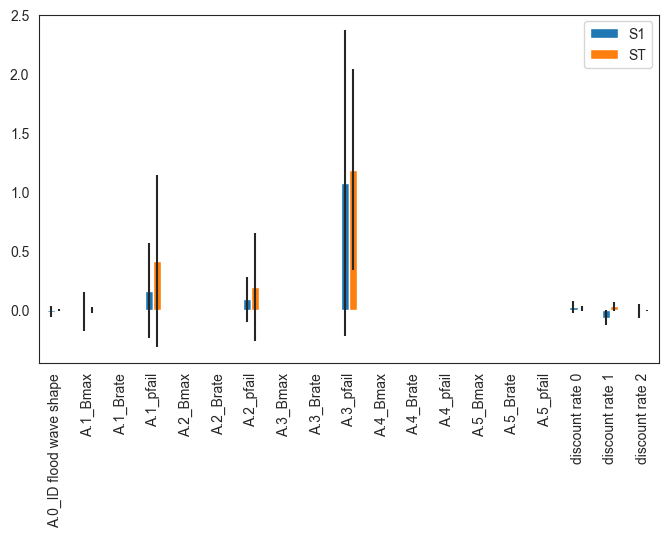


****************************************************************************************************

A.3_Expected Number of Deaths
                                   ST       ST_conf
A.0_ID flood wave shape  3.486095e-03  1.242263e-02
A.1_Bmax                 1.412761e-03  1.000747e-02
A.1_Brate                3.506594e-09  2.483941e-08
A.1_pfail                4.059219e-01  6.685769e-01
A.2_Bmax                 0.000000e+00  0.000000e+00
A.2_Brate                0.000000e+00  0.000000e+00
A.2_pfail                2.863570e-01  4.868655e-01
A.3_Bmax                 0.000000e+00  0.000000e+00
A.3_Brate                0.000000e+00  0.000000e+00
A.3_pfail                9.519818e-01  7.560056e-01
A.4_Bmax                 0.000000e+00  0.000000e+00
A.4_Brate                0.000000e+00  0.000000e+00
A.4_pfail                0.000000e+00  0.000000e+00
A.5_Bmax                 0.000000e+00  0.000000e+00
A.5_Brate                0.000000e+00  0.000000e+00
A.5_pfail                0.000000e+

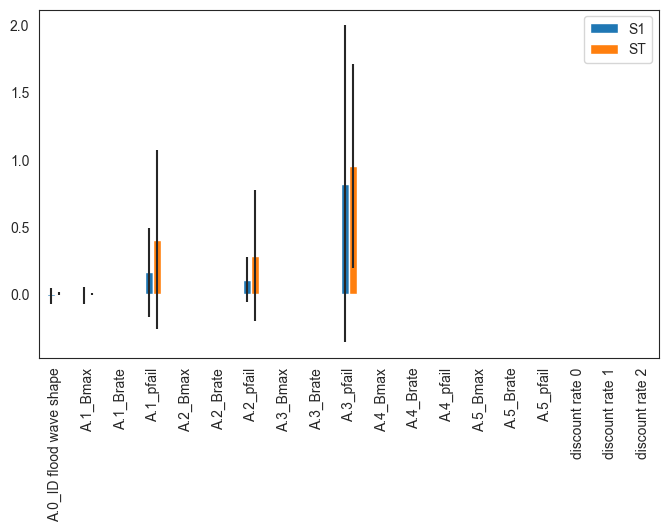

In [27]:
dike_model, planning_step = get_model_for_problem_formulation(3)
problem = get_SALib_problem(dike_model.uncertainties)
for key in outcome_string_3:
    print('\n' + '*'*100 + '\n')
    print(key)
    Si = sobol.analyze(problem, outcomes[key], calc_second_order=True, print_to_console=True)
    Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(Si_filter, index=problem['names'])
    
    sns.set_style('white')
    fig, ax = plt.subplots(1)
    
    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]
    
    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3)
    plt.show()

Sobol index analysis yields more reasonable results. It shows that
- pfail of A1, A2 and especially A3 have huge impact on the **A.3_Total cost** **A.3_Expected Number of Deaths**. The impacts are primarily first order impact, rather than through interactions with other uncertainties.

## Feature scoring

In [35]:
# for key in outcome_string_3:
#     print('\n' + '*'*100 + '\n')
#     print(key)
scores = feature_scoring.get_feature_scores_all(experiment[uncertainty_string], df_outcomes[outcome_string_3],
                                      max_features=0.6, mode=RuleInductionType.REGRESSION)
scores

,A.3 Total Costs,A.3_Expected Number of Deaths
0,,
A.1_Bmax,0.025653,0.043158
A.1_Brate,0.021938,0.034094
A.1_pfail,0.199071,0.234056
A.2_Bmax,0.021790,0.020288
A.2_Brate,0.018835,0.014265
A.2_pfail,0.036580,0.035702
A.3_Bmax,0.086218,0.078404
A.3_Brate,0.031568,0.030614
A.3_pfail,0.408740,0.381988


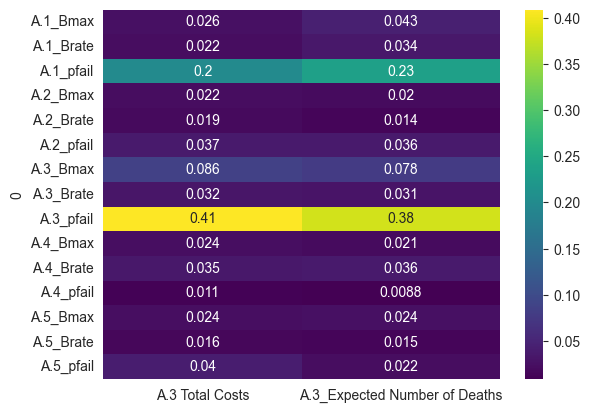

In [36]:
sns.heatmap(scores, annot=True, cmap='viridis')
plt.show()

# OOI for dike ring 3

In [2]:
experiment_3, outcomes_3 = load_results(os.path.join('.', 'experiment', 'pol0_ooi3.tar.gz'))

In [3]:
experiment_3

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,18,136.742460,1.5,0.460461,229.017736,1.0,0.109897,326.335136,1.5,0.507733,...,0,0,0,0,0,0,0,0,Policy 0,dikesnet
1,70,136.742460,1.5,0.460461,229.017736,1.0,0.109897,326.335136,1.5,0.507733,...,0,0,0,0,0,0,0,1,Policy 0,dikesnet
2,18,277.795869,1.5,0.460461,229.017736,1.0,0.109897,326.335136,1.5,0.507733,...,0,0,0,0,0,0,0,2,Policy 0,dikesnet
3,18,136.742460,10.0,0.460461,229.017736,1.0,0.109897,326.335136,1.5,0.507733,...,0,0,0,0,0,0,0,3,Policy 0,dikesnet
4,18,136.742460,1.5,0.950927,229.017736,1.0,0.109897,326.335136,1.5,0.507733,...,0,0,0,0,0,0,0,4,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,9,122.372620,10.0,0.040937,31.854372,10.0,0.977058,263.677845,1.5,0.855125,...,0,0,0,0,0,0,0,395,Policy 0,dikesnet
396,9,122.372620,10.0,0.040937,31.854372,10.0,0.977058,263.677845,1.5,0.855125,...,0,0,0,0,0,0,0,396,Policy 0,dikesnet
397,9,122.372620,10.0,0.040937,31.854372,10.0,0.977058,263.677845,1.5,0.855125,...,0,0,0,0,0,0,0,397,Policy 0,dikesnet
398,9,122.372620,10.0,0.040937,31.854372,10.0,0.977058,263.677845,1.5,0.855125,...,0,0,0,0,0,0,0,398,Policy 0,dikesnet


In [5]:
outcomes_3

{'A.3_Expected Annual Damage': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.18212702e+08, 1.47928684e+08, 2.18212702e+08, 2.18212702e+08,
        0.00000000e+00, 2.18212702e+08, 2.18212702e+08, 2.18212702e+08,
        2.18212702e+08, 2.18212702e+08, 1.48014496e+09, 2.18212702e+08,
        2.18212702e+08, 2.18212702

In [6]:
df_outcomes3 = pd.DataFrame(outcomes_3)

In [7]:
df_outcomes3

,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0
...,...,...,...
395,0.0,0,0.0
396,0.0,0,0.0
397,0.0,0,0.0
398,0.0,0,0.0


In [12]:
df_outcomes3.describe()

,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths
count,4.000000e+02,400.0,400.000000
mean,3.447318e+08,0.0,0.592751
std,5.597313e+08,0.0,0.933222
min,0.000000e+00,0.0,0.000000
25%,0.000000e+00,0.0,0.000000
50%,1.575742e+07,0.0,0.030216
75%,4.279159e+08,0.0,0.859890
max,2.264106e+09,0.0,3.164855


In [13]:
df_outcomes.describe()

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
count,4.000000e+02,400.000000,4.000000e+02,400.000000,4.000000e+02,400.000000,4.000000e+02,400.000000,4.000000e+02,400.000000,400.0,400.0
mean,1.200920e+09,0.797325,1.371620e+08,0.124761,3.819162e+08,0.688880,8.116713e+06,0.003882,3.612010e+07,0.037423,0.0,0.0
std,1.368771e+09,0.893932,2.497601e+08,0.220594,7.111667e+08,1.264504,1.704992e+07,0.008194,1.090639e+08,0.116533,0.0,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
50%,1.760219e+08,0.133942,2.677327e+07,0.032456,1.382005e+07,0.022306,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
75%,2.602781e+09,1.991927,1.391412e+08,0.151211,2.271698e+08,0.450960,5.542232e+06,0.002235,0.000000e+00,0.000000,0.0,0.0
max,4.135044e+09,2.033318,1.013288e+09,0.915041,2.723477e+09,3.730580,1.329456e+08,0.051634,6.475677e+08,0.591132,0.0,0.0
